In [99]:
%config InlineBackend.figure_format = 'retina'

In [100]:
import pandas as pd
import numpy as np
from plotting import plot_ts

In [101]:
file_path = "data_files/financial_basis/all_stocks_5yr.csv"
df = pd.read_csv(file_path, parse_dates = ['date'])

def select_stock(stock:str):
    return df[df['Name'] == stock].copy()

In [102]:
### Choose SBUX stock
sbux = select_stock("SBUX")
plot_ts(sbux['date'], sbux['close'], title = 'SBUX price plot')

In [103]:
# calculate previous day stock price
sbux['prev_close'] = sbux['close'].shift(1)
sbux

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915
...,...,...,...,...,...,...,...,...
499406,2018-02-01,56.280,56.420,55.890,56.000,14690146,SBUX,56.810
499407,2018-02-02,55.900,56.320,55.700,55.770,15358909,SBUX,56.000
499408,2018-02-05,55.530,56.260,54.570,54.690,16059955,SBUX,55.770
499409,2018-02-06,53.685,56.060,53.560,55.610,17415065,SBUX,54.690


In [104]:
# net return 
sbux['net_return'] = sbux['close'] / sbux['prev_close'] - 1

# gross return
sbux['gross_return'] = sbux['net_return'] + 1

# log return 
sbux['log_return'] = np.log(sbux['gross_return'])

sbux['pct_change'] = sbux['close'].pct_change()
sbux

,date,open,high,low,close,volume,Name,prev_close,net_return,gross_return,log_return,pct_change
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,0.995920,-0.004089,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,1.002138,0.002135,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,0.992357,-0.007672,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,0.994985,-0.005028,-0.005015
...,...,...,...,...,...,...,...,...,...,...,...,...
499406,2018-02-01,56.280,56.420,55.890,56.000,14690146,SBUX,56.810,-0.014258,0.985742,-0.014361,-0.014258
499407,2018-02-02,55.900,56.320,55.700,55.770,15358909,SBUX,56.000,-0.004107,0.995893,-0.004116,-0.004107
499408,2018-02-05,55.530,56.260,54.570,54.690,16059955,SBUX,55.770,-0.019365,0.980635,-0.019555,-0.019365
499409,2018-02-06,53.685,56.060,53.560,55.610,17415065,SBUX,54.690,0.016822,1.016822,0.016682,0.016822


*Use pct_change instead of calculate by hand*

In [105]:
assert all((sbux['pct_change'] ==  sbux['net_return']).iloc[1:])

In [106]:
def calculate_return(df:pd.DataFrame, price_col:str):
    df['net_return'] = df[price_col].pct_change()
    df['gross_return'] = df['net_return'] + 1
    df['log_return'] = np.log(df['gross_return'])
    return df

In [107]:
plot_ts(sbux.date, sbux['net_return'],'SBUX Net Return Plot')

In [108]:
plot_ts(sbux.date, sbux['gross_return'],'SBUX Gross Return Plot')

In [109]:
plot_ts(sbux.date, sbux['log_return'],'SBUX Log Return Plot')

In [110]:
import plotly.express as px

px.histogram(data_frame = sbux, 
x = ['net_return','log_return'], 
barmode = 'overlay', 
opacity = 0.5,
title = "Histogram of Returns")

In [111]:
px.histogram(data_frame = sbux, 
x = ['gross_return'], 
opacity = 0.5,
title = "Gross Return")

### Similar Distribution

In [112]:
pd.concat([
    sbux['net_return'].describe(), 
    sbux['log_return'].describe()], 
axis = 1)

,net_return,log_return
count,1258.000000,1258.000000
mean,0.000600,0.000524
std,0.012361,0.012381
min,-0.092437,-0.096992
25%,-0.005841,-0.005858
50%,0.000577,0.000577
75%,0.007815,0.007784
max,0.076133,0.073374


### QQ plot - compare distribution with theoretical distribution

*不需要把这条曲线展示给用户的时候，画matplotlib图就行了*

In [113]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
from scipy.stats import norm

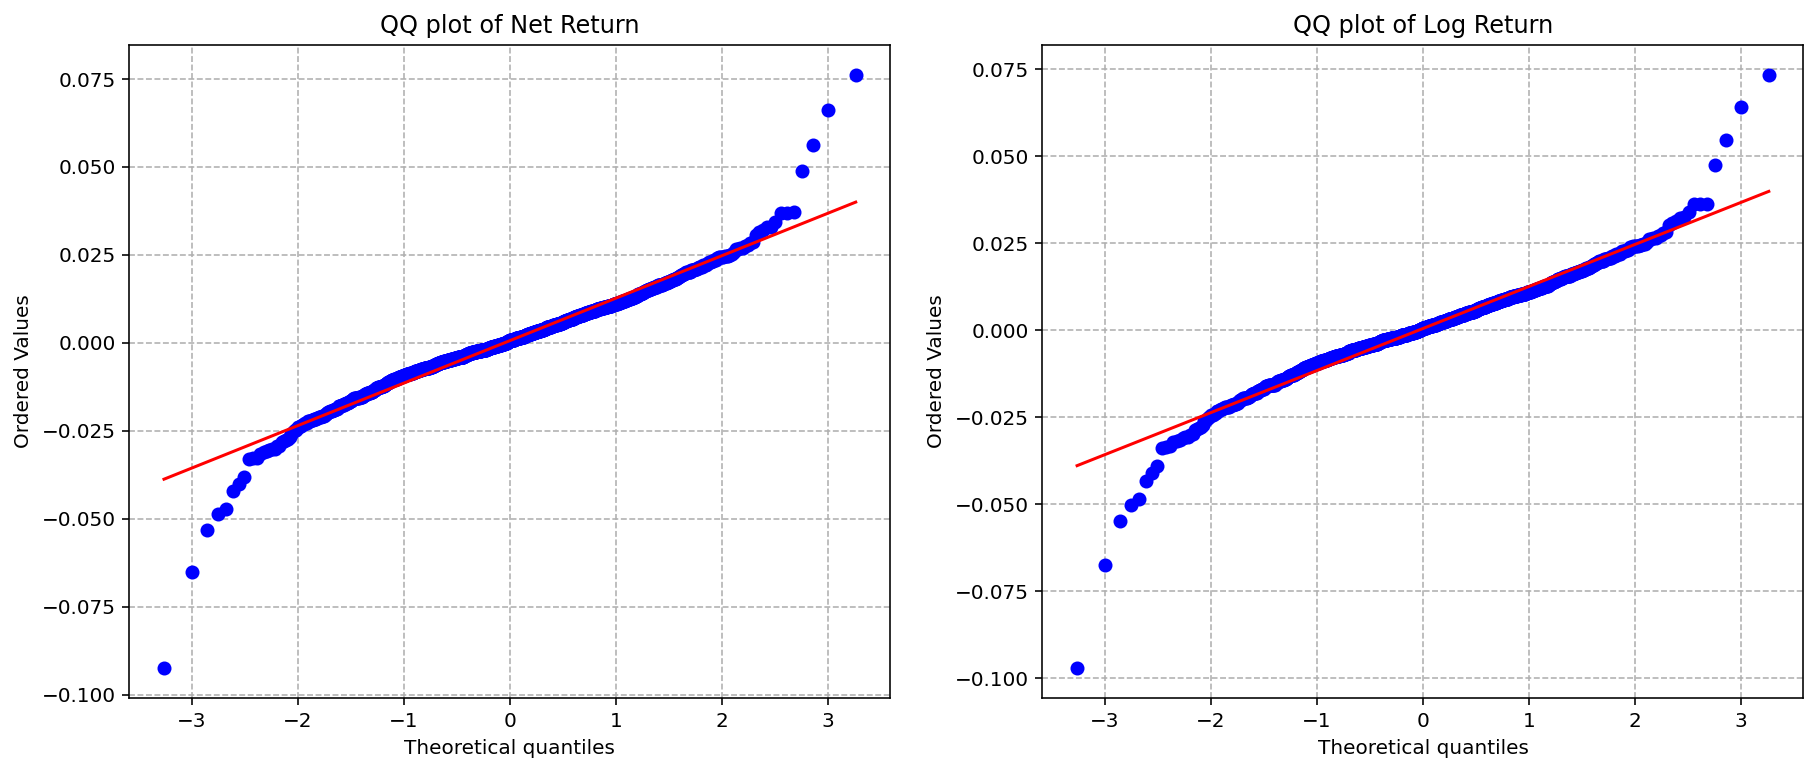

In [114]:
fig,ax = plt.subplots(figsize = (15,6))
plt.subplot(1,2,1)

# only this line important
probplot(sbux['net_return'].dropna(), dist='norm', fit=True, plot=plt)

plt.grid(linestyle = "--")
plt.title("QQ plot of Net Return")
plt.subplot(1,2,2)

# only this line important
probplot(sbux['log_return'].dropna(), dist='norm', fit=True, plot=plt)

plt.grid(linestyle = "--")
plt.title("QQ plot of Log Return")
plt.show()

### Plot histogram or distritbuion

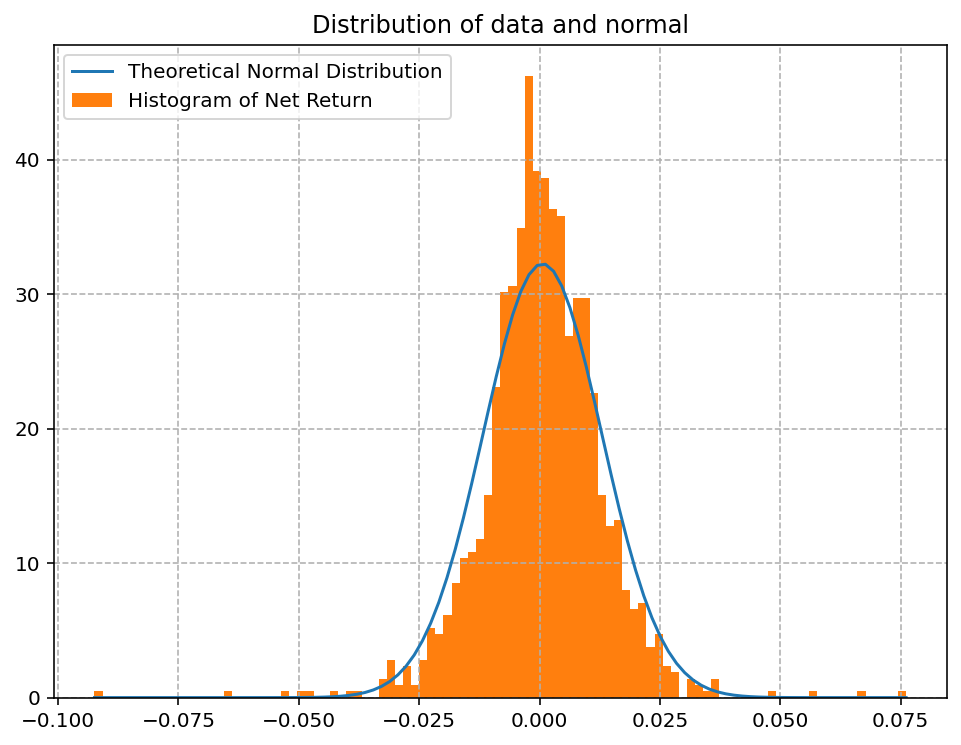

In [115]:
min_val = sbux['net_return'].min()
max_val = sbux['net_return'].max()
mu = sbux['net_return'].mean()
std = sbux['net_return'].std()

x_values = np.linspace(min_val, max_val, 100)
theoretical = norm(loc = mu, scale = std).pdf(x_values)

fig, ax = plt.subplots(figsize =(8,6))
plt.plot(x_values, theoretical, label = "Theoretical Normal Distribution")
sbux['net_return'].hist(density = True,bins = 100, label = "Histogram of Net Return")
plt.legend(loc = 'upper left')
plt.grid(linestyle = '--')
plt.title("Distribution of data and normal")
plt.show()

### The t distribution

In [116]:
from scipy import stats

*Shape of t distribution*

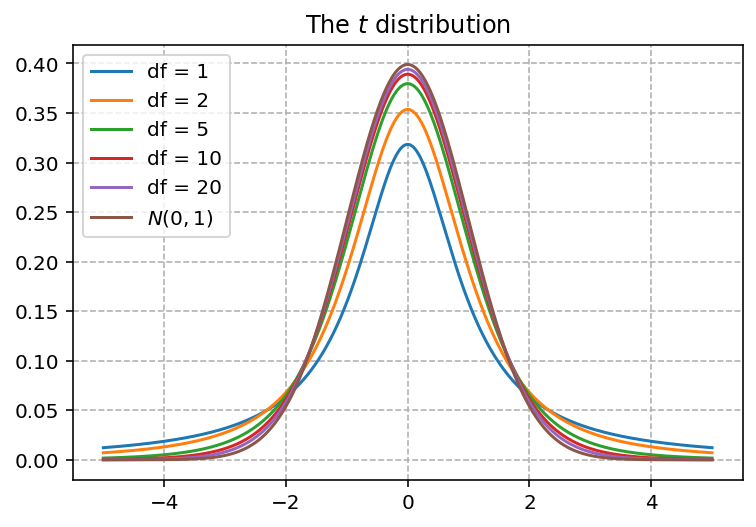

In [127]:
x_values = np.linspace(-5,5, 1000)
for nu in [1,2,5,10,20]:
    y_values = stats.t.pdf(x_values, df = nu)
    plt.plot(x_values,y_values, label = f"df = {nu}")
norm_values = stats.norm.pdf(x_values)
plt.plot(x_values, norm_values, label = "$N(0,1)$")
plt.legend(loc = 'upper left')
plt.grid(linestyle = '--')
plt.title("The $t$ distribution")
plt.show()

*fit t distribution*

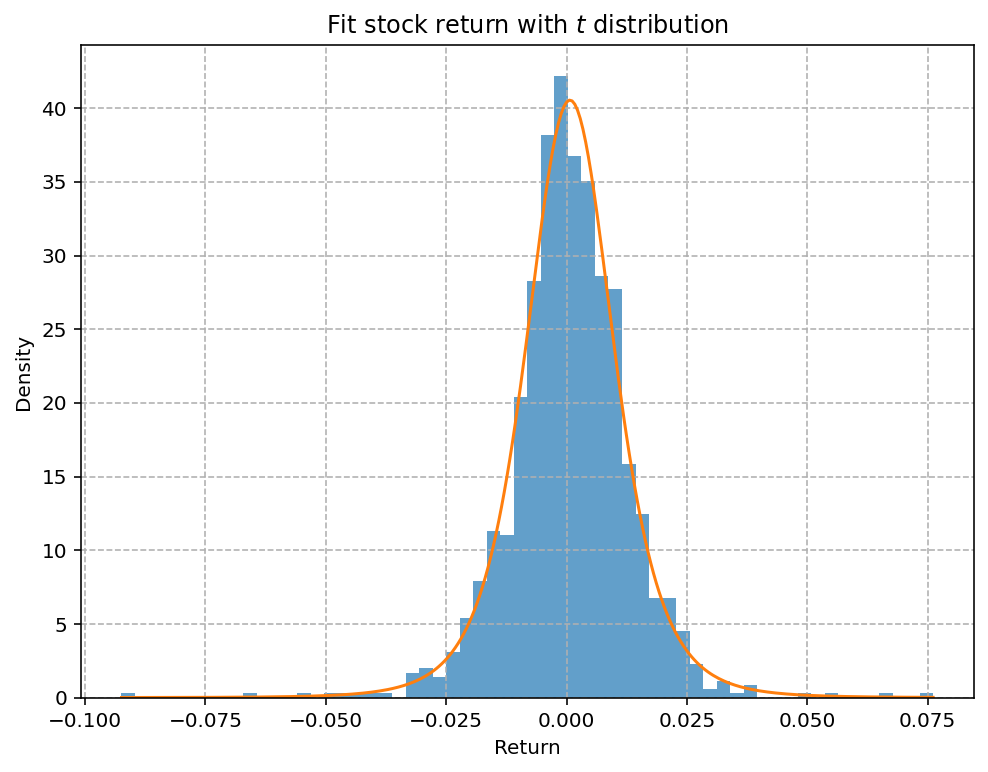

In [154]:
# this line fit data with a t distribution
nu, loc, scale = stats.t.fit(sbux['net_return'].dropna())

# the rest of the code is just for plotting purpose
min_val = sbux['net_return'].min()
max_val = sbux['net_return'].max()

x_values = np.linspace(min_val, max_val, 300)
y_values = stats.t.pdf(x_values, df = nu, loc = loc, scale = scale)

fig, ax = plt.subplots(figsize = (8,6))
plt.hist(sbux['net_return'].dropna(), label = "Net Return", density = True, bins = 60,alpha = 0.7)
plt.plot(x_values, y_values, label = "Theoretical Normal Distribution")
plt.grid(linestyle = '--')
plt.title("Fit stock return with $t$ distribution")
plt.xlabel("Return")
plt.ylabel("Density")
plt.show()

*Stock return looks more like a t distribution*

In [171]:
# probplot?

dist : str or **stats.distributions instance**, optional

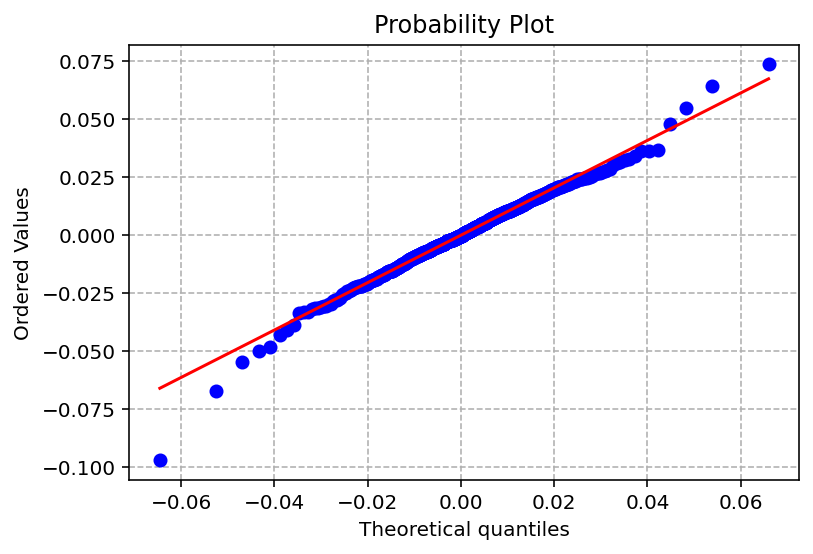

In [167]:
# you can pass an distritbion object to dist parameter
# this can be tricky, but it is worth it
probplot(sbux['log_return'].dropna(), 
        dist=stats.t(df = nu, loc = loc, scale = scale), 
        fit=True, plot=plt)
plt.grid(linestyle= "--")
plt.show()

*QQ plot show a straight line, a good fit*

### Estimate confidence interval

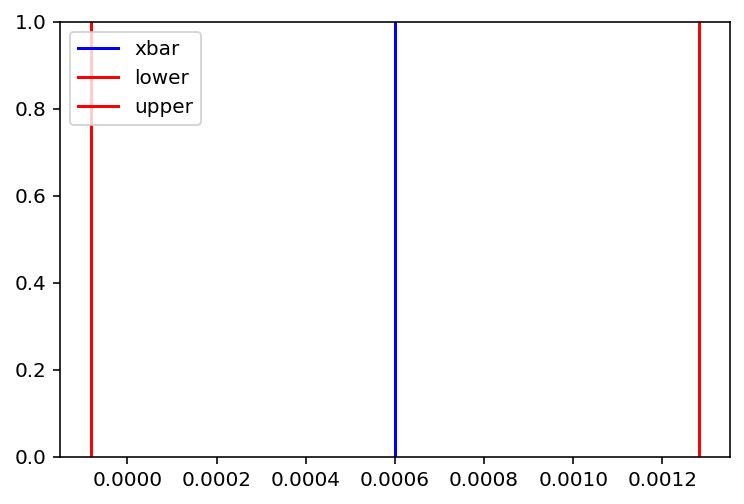

In [206]:
lower, upper = stats.norm().ppf(0.025), stats.norm().ppf(0.975)
xbar = sbux['net_return'].mean()
s = sbux['net_return'].std()
N = len(sbux)
confidence_interval = [xbar + lower * s / np.sqrt(N), 
                        xbar + upper * s / np.sqrt(N)]
plt.axvline(xbar, color='b', label = 'xbar')
plt.axvline(confidence_interval[0], color = 'r',label = "lower")
plt.axvline(confidence_interval[1], color = 'r', label = "upper")
plt.legend(loc = 'upper left')
plt.show()